In [1]:
#import packages

# Standard operational package imports.
import numpy as np
import pandas as pd

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.linear_model import LogisticRegression
import sklearn.metrics  as metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [3]:
#load the dataset
df_original = pd.read_csv("C:\\Users\\Muskan Saleh\\Downloads\\Invistico_Airline.csv.crdownload")

In [4]:
df_original.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65.0,Personal Travel,Eco,265.0,0.0,0.0,0.0,2.0,...,2.0,3.0,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0
1,satisfied,Loyal Customer,47.0,Personal Travel,Business,2464.0,0.0,0.0,0.0,3.0,...,2.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0
2,satisfied,Loyal Customer,15.0,Personal Travel,Eco,2138.0,0.0,0.0,0.0,3.0,...,2.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0
3,satisfied,Loyal Customer,60.0,Personal Travel,Eco,623.0,0.0,0.0,0.0,3.0,...,3.0,1.0,1.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0
4,satisfied,Loyal Customer,70.0,Personal Travel,Eco,354.0,0.0,0.0,0.0,3.0,...,4.0,2.0,2.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50454 entries, 0 to 50453
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       50454 non-null  object 
 1   Customer Type                      50454 non-null  object 
 2   Age                                50453 non-null  float64
 3   Type of Travel                     50453 non-null  object 
 4   Class                              50453 non-null  object 
 5   Flight Distance                    50453 non-null  float64
 6   Seat comfort                       50453 non-null  float64
 7   Departure/Arrival time convenient  50453 non-null  float64
 8   Food and drink                     50453 non-null  float64
 9   Gate location                      50453 non-null  float64
 10  Inflight wifi service              50453 non-null  float64
 11  Inflight entertainment             50453 non-null  flo

In [6]:
df_original.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,50453.000000,50453.000000,50453.000000,50453.000000,50453.000000,50453.000000,50453.000000,50453.000000,50453.000000,50453.000000,50453.000000,50453.000000,50453.000000,50453.000000,50453.000000,50453.000000,50453.000000,50286.000000
mean,36.756625,1838.506570,2.586486,3.078429,2.516520,2.972351,3.165144,2.882366,3.353656,3.344538,3.452144,3.446158,3.743187,3.383248,3.767705,3.276911,14.580937,15.017182
std,17.490336,812.228443,1.386813,1.575177,1.418716,1.211961,1.356162,1.480219,1.392026,1.362052,1.266246,1.299841,1.143108,1.251856,1.128151,1.346542,37.560751,38.040868
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,23.000000,1376.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,35.000000,1850.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,2296.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
df_original.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    1
Type of Travel                         1
Class                                  1
Flight Distance                        1
Seat comfort                           1
Departure/Arrival time convenient      1
Food and drink                         1
Gate location                          1
Inflight wifi service                  1
Inflight entertainment                 1
Online support                         1
Ease of Online booking                 1
On-board service                       1
Leg room service                       1
Baggage handling                       1
Checkin service                        1
Cleanliness                            1
Online boarding                        1
Departure Delay in Minutes             1
Arrival Delay in Minutes             168
dtype: int64

In [10]:
#Check the number of satisfied customers in the dataset
df_original['satisfaction'].value_counts()

satisfaction
dissatisfied    30787
satisfied       19667
Name: count, dtype: int64

In [11]:
df_subset = df_original.dropna(axis=0).reset_index(drop  = True)

In [12]:
#Check for missing values
df_subset.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [13]:
#display datatypes of columns
df_subset.dtypes

satisfaction                          object
Customer Type                         object
Age                                  float64
Type of Travel                        object
Class                                 object
Flight Distance                      float64
Seat comfort                         float64
Departure/Arrival time convenient    float64
Food and drink                       float64
Gate location                        float64
Inflight wifi service                float64
Inflight entertainment               float64
Online support                       float64
Ease of Online booking               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Cleanliness                          float64
Online boarding                      float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
dtype: obj

In [14]:
#Convert the categorical column satisfaction into numeric through one-hot encoding.

df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()



In [15]:
df_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65.0,Personal Travel,Eco,265.0,0.0,0.0,0.0,2.0,...,2.0,3.0,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0
1,1.0,Loyal Customer,47.0,Personal Travel,Business,2464.0,0.0,0.0,0.0,3.0,...,2.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0
2,1.0,Loyal Customer,15.0,Personal Travel,Eco,2138.0,0.0,0.0,0.0,3.0,...,2.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0
3,1.0,Loyal Customer,60.0,Personal Travel,Eco,623.0,0.0,0.0,0.0,3.0,...,3.0,1.0,1.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0
4,1.0,Loyal Customer,70.0,Personal Travel,Eco,354.0,0.0,0.0,0.0,3.0,...,4.0,2.0,2.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0
5,1.0,Loyal Customer,30.0,Personal Travel,Eco,1894.0,0.0,0.0,0.0,3.0,...,2.0,2.0,5.0,4.0,5.0,5.0,4.0,2.0,0.0,0.0
6,1.0,Loyal Customer,66.0,Personal Travel,Eco,227.0,0.0,0.0,0.0,3.0,...,5.0,5.0,5.0,0.0,5.0,5.0,5.0,3.0,17.0,15.0
7,1.0,Loyal Customer,10.0,Personal Travel,Eco,1812.0,0.0,0.0,0.0,3.0,...,2.0,2.0,3.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0
8,1.0,Loyal Customer,56.0,Personal Travel,Business,73.0,0.0,0.0,0.0,3.0,...,5.0,4.0,4.0,0.0,1.0,5.0,4.0,4.0,0.0,0.0
9,1.0,Loyal Customer,22.0,Personal Travel,Eco,1556.0,0.0,0.0,0.0,3.0,...,2.0,2.0,2.0,4.0,5.0,3.0,4.0,2.0,30.0,26.0


In [16]:
#Create the training and testing data
X = df_subset[["Inflight entertainment"]]
y = df_subset["satisfaction"]

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [18]:
#Fit a LogisticRegression model to the data
model = LogisticRegression().fit(X_train,y_train)

In [19]:
#Obtain parameter estimates
model.coef_

array([[0.7682996]])

In [20]:
model.intercept_

array([-2.80034288])

<Axes: xlabel='Inflight entertainment', ylabel='satisfaction'>

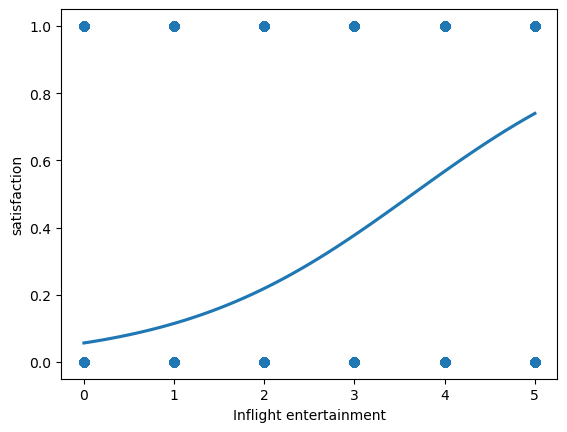

In [21]:
#Create a plot of your model to visualize results
sns.regplot(x="Inflight entertainment",y="satisfaction", data = df_subset, logistic=True, ci=None )

The graph seems to indicate that the higher the inflight entertainment value, the higher the customer satisfaction, though this is currently not the most informative plot. The graph currently doesn't provide much insight into the data points, as Inflight entertainment is categorical.

In [22]:
#Predict the outcome for the test dataset
y_pred = model.predict(X_test)

In [23]:
#print predictions
y_pred

array([0., 1., 0., ..., 1., 0., 1.])

In [24]:
## Use predict_proba to output a probability and predict functions on X_test
model.predict_proba(X_test)

array([[0.94269435, 0.05730565],
       [0.26092718, 0.73907282],
       [0.62138808, 0.37861192],
       ...,
       [0.43220621, 0.56779379],
       [0.88412058, 0.11587942],
       [0.26092718, 0.73907282]])

In [25]:
## Use predict to output 0's and 1's.
model.predict(X_test)

array([0., 1., 0., ..., 1., 0., 1.])

In [26]:
#Print out the model's accuracy, precision, recall, and F1 score.
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.794644
Precision: 0.724336
Recall: 0.757113
F1 Score: 0.740362


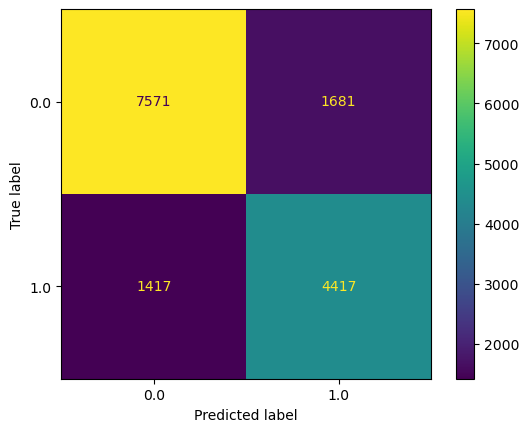

In [27]:
#produce a confusion matrix.
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()